In [1]:
import math
import numpy as np
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pyplot as plt
from skimage import io, filters
from scipy import signal, ndimage
import cv2
import random
import os

In [10]:

def ShowImage(img, name):
    fig, axes = plt.subplots(1)
    axes.imshow(img, cmap="gray")
    axes.set_title(name)
    axes.axis("off")    
    fig.set_figwidth(10)    
    fig.set_figheight(10)  
    plt.show()

def PrintHist(imageArray, text):
    x = [i for i in range(0,256)]
    y = np.zeros(256, dtype = int)
    y1 = np.zeros(256, dtype = int)
    y2 = np.zeros(256, dtype = int)
    y3 = np.zeros(256, dtype = int)
    plt.figure(figsize=[10,6])
    if len(imageArray.shape)>2:
      for i in imageArray[:,:,0].flat:
        y[i] += 1
      for i in imageArray[:,:,1].flat:
        y1[i] += 1
      for i in imageArray[:,:,2].flat:
        y2[i] += 1
      for i in imageArray.flat:
        y3[i] += 1
      plt.bar(x, y)
      plt.bar(x, y1)
      plt.bar(x, y2)
    else:
      for i in imageArray.flat:
        y3[i] += 1
      plt.bar(x, y3)
    plt.title(text)
    plt.ylabel("Кол-во пикселей")
    plt.xlabel("Уровень яркости")
    plt.xlim([-1, 256])
    plt.show()
    IsLight(y3, imageArray)
    pass

def IsLight(lightArray, imgArray):
  lightArray = lightArray / imgArray.size
  treshHold = (np.max(lightArray) * 10)/100
  newLightArray = lightArray > treshHold
  newLightArraySum = newLightArray.sum()
  if newLightArraySum > 7:
    print("Тоновое")
  elif newLightArraySum <= 2 and newLightArraySum != 0:
    print("Штриховое")
  else:
    print("Многоградационное")
  pass

def IsGreyScale(img):
  imgRGB = img.convert('RGB')
  w,h = imgRGB.size
  for i in range(w):
    for j in range(h):
      r,g,b = imgRGB.getpixel((i,j))
      if r != g != b: return False
  return True

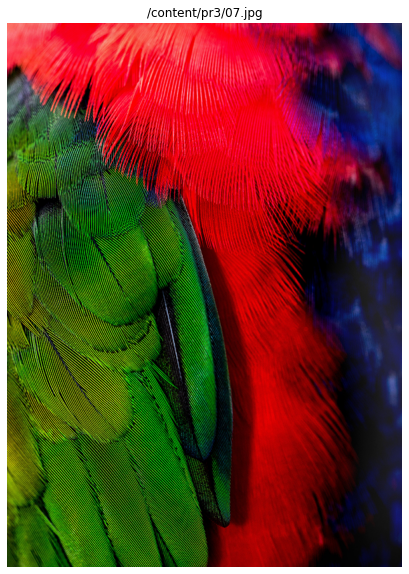

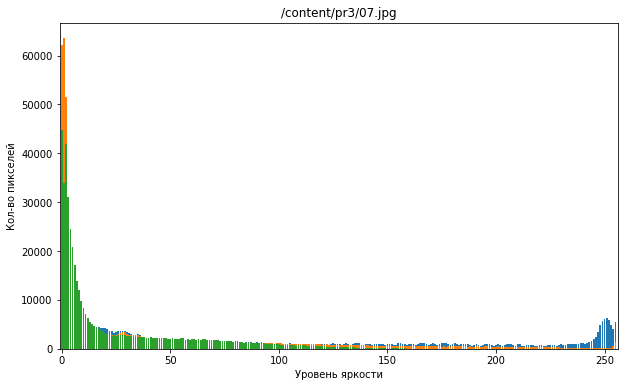

Тоновое
Цветное



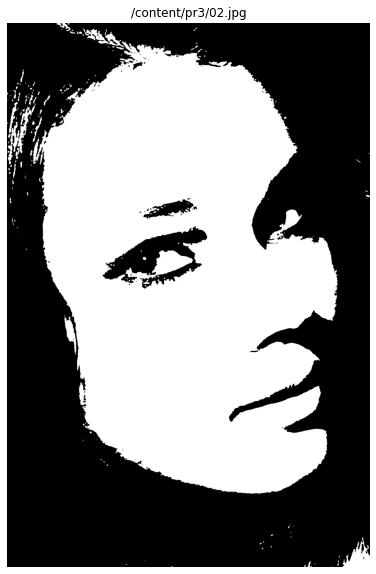

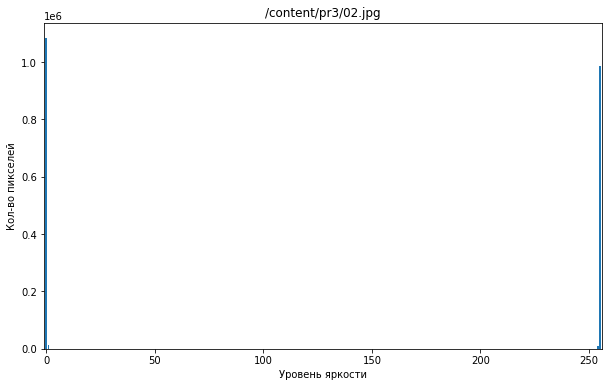

Штриховое
Черно-белое



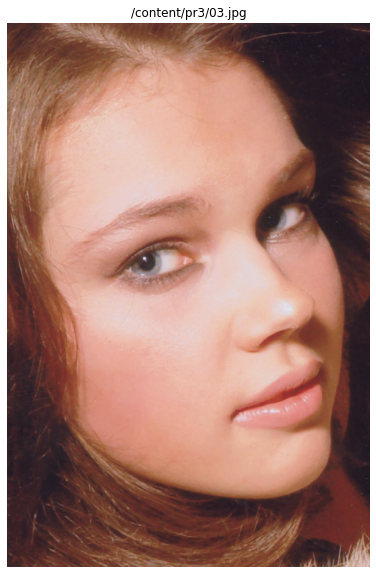

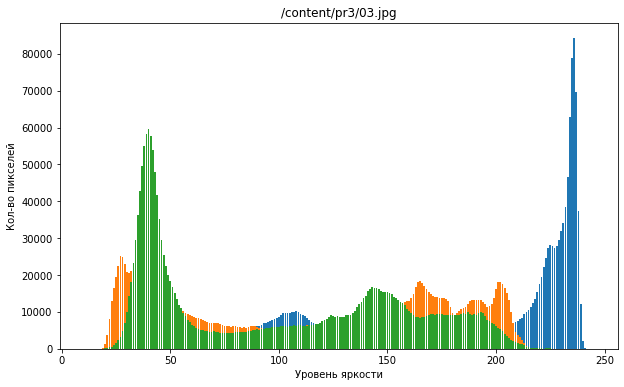

Тоновое
Цветное



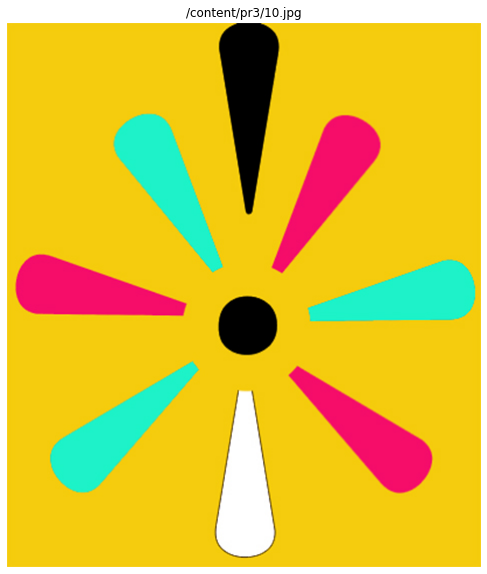

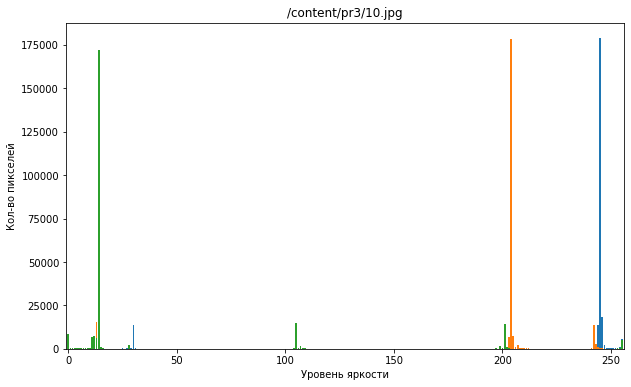

Многоградационное
Цветное



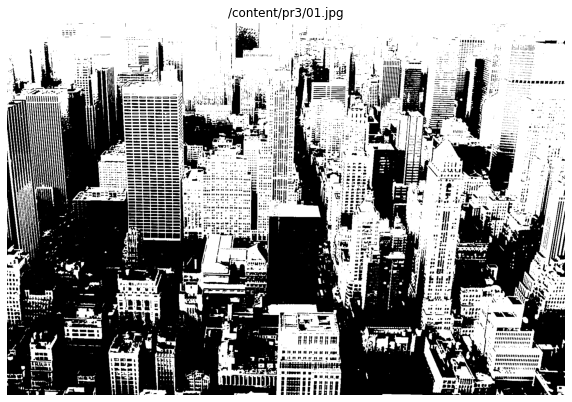

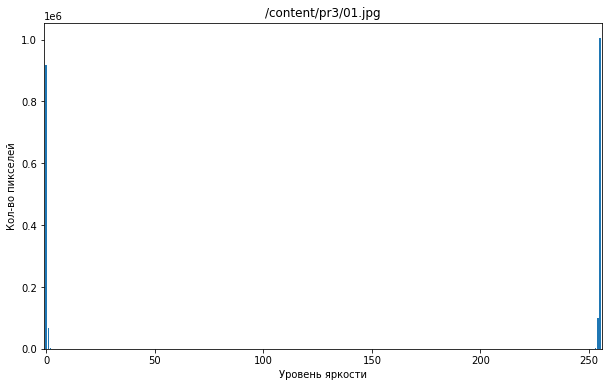

Штриховое
Черно-белое



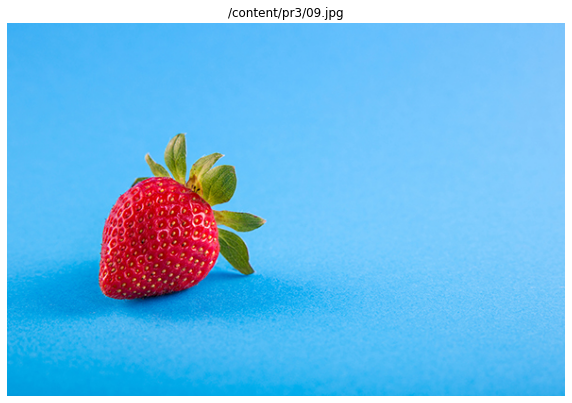

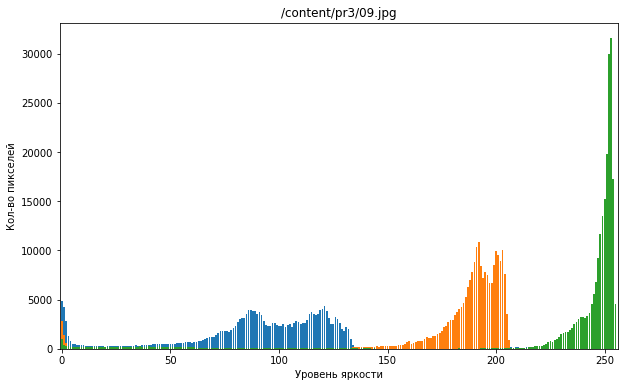

Тоновое
Цветное



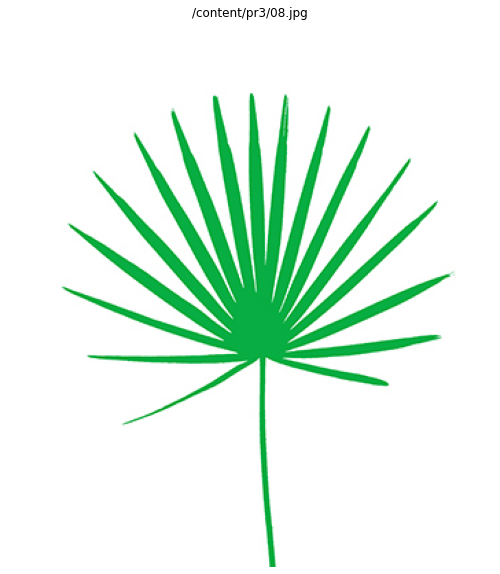

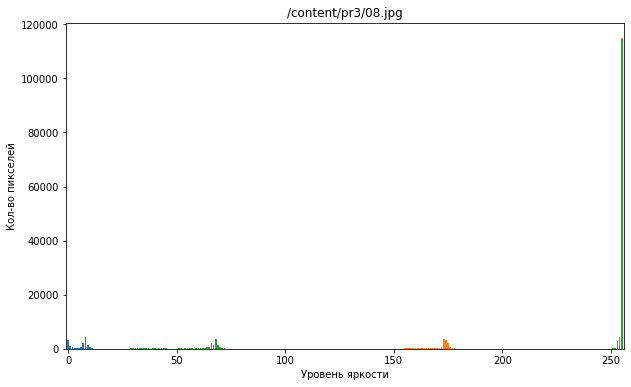

Штриховое
Цветное



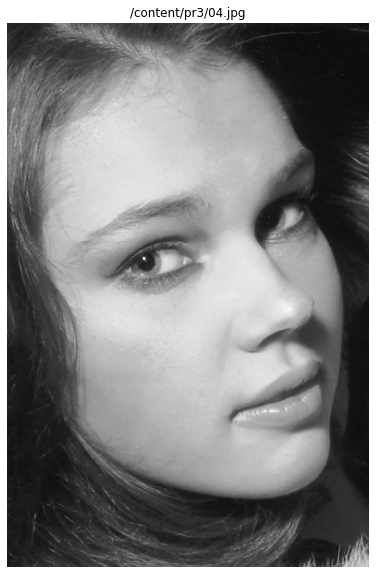

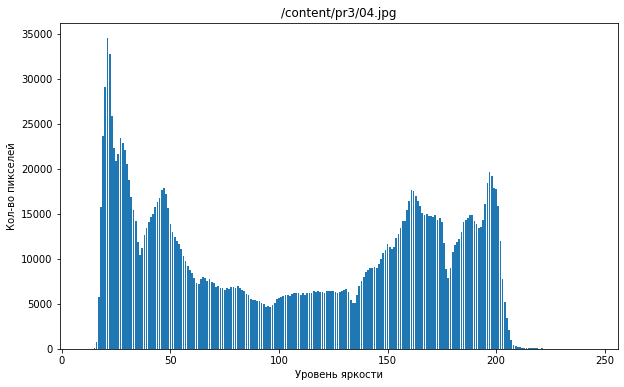

Тоновое
Черно-белое



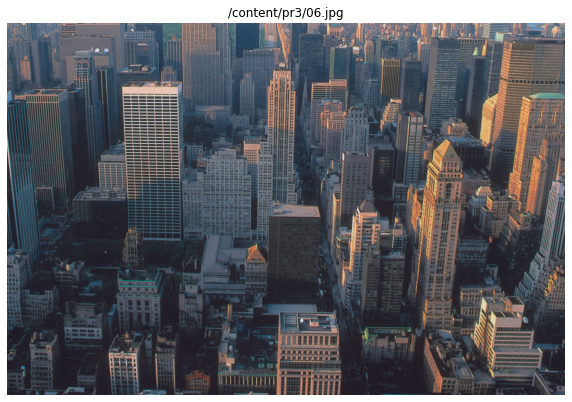

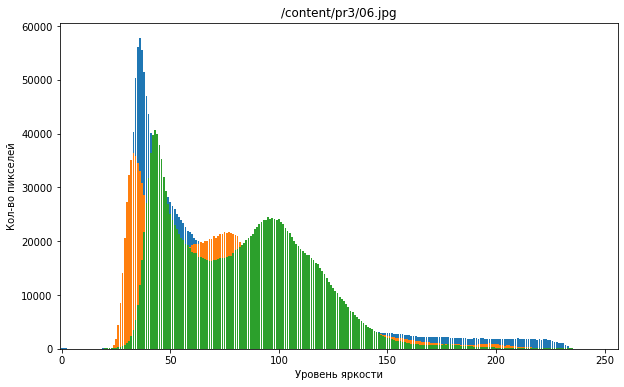

Тоновое
Цветное



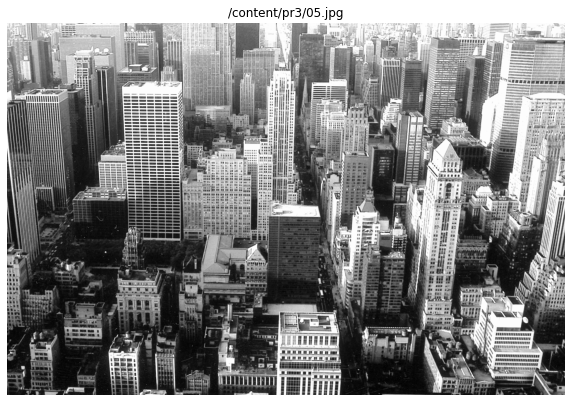

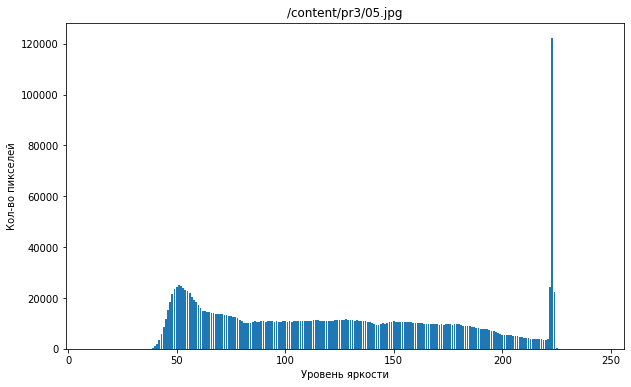

Тоновое
Черно-белое



In [9]:
for root, dirs, files in os.walk("/content/pr3"):  
    for filename in files:
      imgFullPath = f"{root}/{filename}"
      img = Image.open(imgFullPath)
      imgArr = np.asarray(img)
      ShowImage(img, imgFullPath)
      PrintHist(imgArr, imgFullPath)
      if IsGreyScale(img) == True:
        print("Черно-белое")
      else:
        print("Цветное")
      print()